I've run chains to calculate the redMagic HOD in buzzard. Gonna compare to the actual one measured in buzzard. It'll be tough to fit to but I can at least make a plot.

In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.81120]}

In [4]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [5]:
cat.load(0.81120, tol = 0.01, HOD='hsabRedMagic', particles = False)#, hod_kwargs = {'sec_haloprop_key':'halo_log_nfw_conc'})#, hod_kwargs={'split': 0.5})

In [6]:
MAP = [12.3475794,   0.26163006,  0.30944855, 11.41793147,  0.44999606,  0.01446294,
 13.94853439,  1.20729256]

param_names = ['logMmin','mean_occupation_centrals_assembias_param1', 'f_c', 'logM0', 'sigma_logM',
                                     'mean_occupation_satellites_assembias_param1',     'logM1',   'alpha']

params = dict(zip(param_names, MAP))

In [7]:
cat.populate(params)

In [8]:
cen_hod = cat.calc_hod(component = 'central')
sat_hod = cat.calc_hod(component = 'satellite')

In [9]:
mass_bin_range = (9, 16)
mass_bin_size = 0.01
massbins = np.logspace(mass_bin_range[0], mass_bin_range[1], int( (mass_bin_range[1]-mass_bin_range[0])/mass_bin_size )+1 )
mbc = (massbins[:-1]+massbins[1:])/2

In [10]:
redmagic_hod = np.load('/u/ki/jderose/notebooks/des/redmagic_hod_buzzard2_v1.6_mean.npy')

In [11]:
redmagic_cens = redmagic_hod[:, 0, 2]/redmagic_hod[:, 0, 1]
redmagic_sats = redmagic_hod[:, 0, 3]/redmagic_hod[:, 0, 1]

first column is number of halos in that bin, second is centrals, third is sats/

In [12]:
# Joe told me this was the right mass bins but it doesn't fit. 
# Gonna instead assume the same boundaries, but with 21 points
#redmagic_mbins = np.array([1.00000000e+13,   1.35935639e+13,   1.84784980e+13,
#        2.51188643e+13,   3.41454887e+13,   4.64158883e+13,
#        6.30957344e+13,   8.57695899e+13,   1.16591440e+14,
#        1.58489319e+14,   2.15443469e+14,   2.92864456e+14,
#        3.98107171e+14,   5.41169527e+14,   7.35642254e+14,
#        1.00000000e+15])
#redmagic_mbins = np.logspace(13, 15, 21, endpoint = True)
redmagic_mbc = redmagic_hod[:,0,0]

In [13]:
redmagic_mbc

array([5.80405177e+12, 7.67075513e+12, 1.01378290e+13, 1.33983650e+13,
       1.77075569e+13, 2.34026743e+13, 3.09294595e+13, 4.08770148e+13,
       5.40239101e+13, 7.13991195e+13, 9.43625565e+13, 1.24711511e+14,
       1.64821318e+14, 2.17831271e+14, 2.87890323e+14, 3.80481819e+14,
       5.02852659e+14, 6.64580498e+14, 8.78323364e+14])

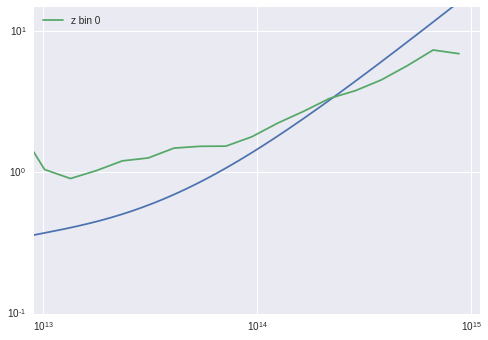

In [14]:
plt.plot(mbc, cen_hod + sat_hod)
#for i in xrange(5):
#    redmagic_cens = redmagic_hod[:, i, 1]/redmagic_hod[:, i, 0]
#    redmagic_sats = redmagic_hod[:, i, 2]/redmagic_hod[:, i, 0]
plt.plot(redmagic_mbc, redmagic_cens + redmagic_sats, label = 'z bin %d'%0)
plt.ylim(1e-1, 15)
plt.xlim(9e12, 1.1e15)
plt.legend(loc='best')
plt.loglog();

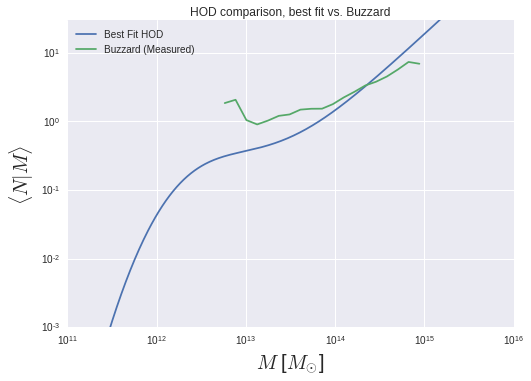

In [24]:
plt.plot(mbc, cen_hod + sat_hod, label = 'Best Fit HOD')
#for i in xrange(5):
#    redmagic_cens = redmagic_hod[:, i, 1]/redmagic_hod[:, i, 0]
#    redmagic_sats = redmagic_hod[:, i, 2]/redmagic_hod[:, i, 0]
plt.plot(redmagic_mbc, redmagic_cens + redmagic_sats, label = 'Buzzard (Measured)')
plt.ylim(1e-3, 30)
plt.xlim(1e11, 1e16)
plt.legend(loc='best', fontsize = 10)
plt.xlabel(r"$M$ [$M_{\odot}$]", fontsize = 20)
plt.ylabel(r"$\langle N | M \rangle$", fontsize = 20)
plt.title("HOD comparison, best fit vs. Buzzard")
plt.loglog();

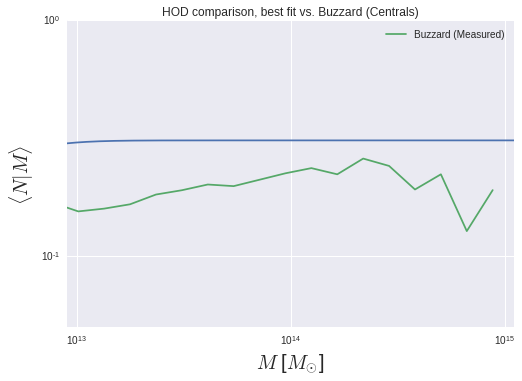

In [25]:
plt.plot(mbc, cen_hod)
#for i in xrange(5):
#    redmagic_cens = redmagic_hod[:, i, 1]/redmagic_hod[:, i, 0]
plt.plot(redmagic_mbc, redmagic_cens, label = 'Buzzard (Measured)')
plt.ylim(5e-2, 1)
plt.xlim(9e12, 1.1e15)
plt.legend(loc='best', fontsize = 10)
plt.xlabel(r"$M$ [$M_{\odot}$]", fontsize = 20)
plt.ylabel(r"$\langle N | M \rangle$", fontsize = 20)
plt.title("HOD comparison, best fit vs. Buzzard (Centrals)")
plt.legend(loc='best')
plt.loglog();

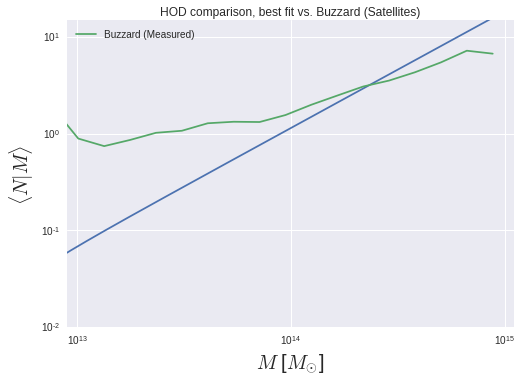

In [26]:
plt.plot(mbc, sat_hod)
#for i in xrange(5):
#    redmagic_sats = redmagic_hod[:, i, 2]/redmagic_hod[:, i, 0]
plt.plot(redmagic_mbc, redmagic_sats, label = 'Buzzard (Measured)')
plt.ylim(1e-2, 15)
plt.xlim(9e12, 1.1e15)
plt.legend(loc='best', fontsize = 10)
plt.xlabel(r"$M$ [$M_{\odot}$]", fontsize = 20)
plt.ylabel(r"$\langle N | M \rangle$", fontsize = 20)
plt.title("HOD comparison, best fit vs. Buzzard (Satellites)")
plt.loglog();